# PfA Summer 2019, Graded Assignment 3-Part2 8/16 @8pm.

**Learning topics:**
- list and dictionary comprehensions
- %time/%timeit magic functions
- Pandas data wrangling
- Creating and interpretting plots

**Please do not share this material on any platform or by any other means.**
    
### **Important Notes:** 

* Purpose of the assignment is to assess your knowledge and command of the Python programming language and your ability to resolve common errors. Grading is based on the code you are submitting, not the formatting of the results. 
* Please use the examples as a guideline, you are not expected to have the same formatting as the example, unless it is a formatting question. 
* Remember, there are many ways to code that can lead to the correct answer, do not hesitate to exercise your own style and python programming coventions. 

---
# Plotting Data with Seaborn 

### Question 7A: Read the marathon dataset and use seaborn.joinplot to plot the relationship between the first-half marathon finishing time and the full-marathon finishing time. 

**Data dictionary**: each observation shows the `age`, `gender` of the runner. `split_sec` is the finishing time of the first-half marathon. `final_sec` is the full-marathon finishing time. 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

In [12]:
# add your code and explanation here
#read data
data = pd.read_csv('marathon_dataset.csv',sep=';')
data.head()

,age,gender,split_sec,final_sec
0,33,M,3938.0,7731.0
1,32,M,3986.0,7768.0
2,31,M,4009.0,7842.0
3,38,M,3976.0,8025.0
4,31,M,3992.0,8039.0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37250 entries, 0 to 37249
Data columns (total 4 columns):
age          37250 non-null int64
gender       37250 non-null object
split_sec    37250 non-null float64
final_sec    37250 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ MB


Text(0.5,0.98,'relationship between the first-half marathon finishing time and the full-marathon finishing time')

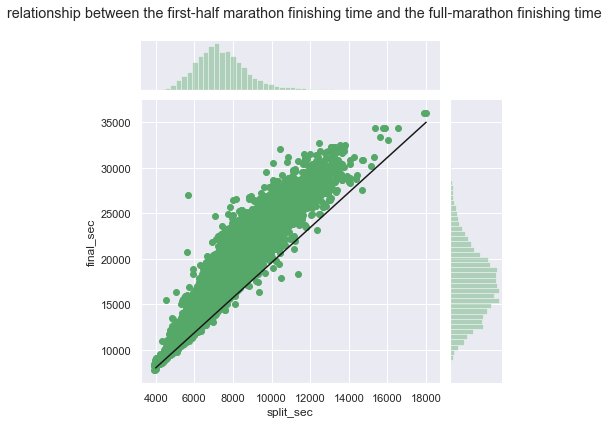

In [177]:
sns.set(rc={'figure.figsize':(20,20)})
plot = sns.jointplot(x="split_sec", y="final_sec", data=data, kind='scatter',color="g")
plot.ax_joint.plot(np.linspace(4000, 18000),
                    np.linspace(8000, 35000), 'k')
plt.subplots_adjust(top=0.9)
plot.fig.suptitle('relationship between the first-half marathon finishing time and the full-marathon finishing time')
#most people get slower over the course of a race

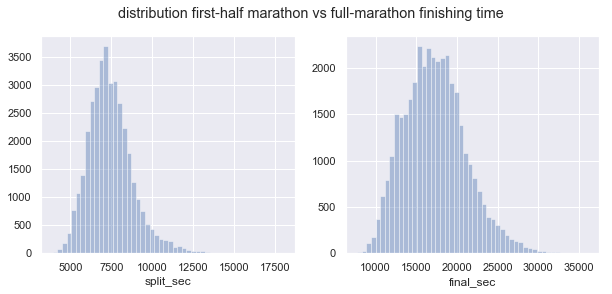

In [174]:
fig, ax =plt.subplots(1,2,figsize=(10,4))
sns.distplot(data['split_sec'], ax=ax[0], kde=False)
sns.distplot(data['final_sec'], ax=ax[1], kde=False)
plt.suptitle('distribution first-half marathon vs full-marathon finishing time')
plt.show()
#neither are normally distubuted; they both have long tails

### Question 7B: Create a distribution plot of runner's racing strategy
Let's define a new variable, to identify the runners' racing strategy: negative-split (those who have a slower first half and faster second half),  positive-split (those who have a faster first half and slower second half).

```racing_str = 1 - (2 * split_sec) / final_sec
```
If racing strategy is less than zero, this indicates runner's strategy is negative-split.

In [89]:
# add your code and explanation here
# it is easier to add a column
data['racing_str'] = 1 - (2 * data['split_sec']) / data['final_sec']
data.head()

,age,gender,split_sec,final_sec,racing_str
0,33,M,3938.0,7731.0,-0.018756
1,32,M,3986.0,7768.0,-0.026262
2,31,M,4009.0,7842.0,-0.022443
3,38,M,3976.0,8025.0,0.009097
4,31,M,3992.0,8039.0,0.006842


In [107]:
sum(data.racing_str < 0)
#people negative-split
#few people have a negative split

251

In [109]:
sum(data.racing_str > 0)
#people positive-split

36995

In [172]:
sum(data.racing_str == 0)
#people even split
#almost no people have an perfectly even split

4

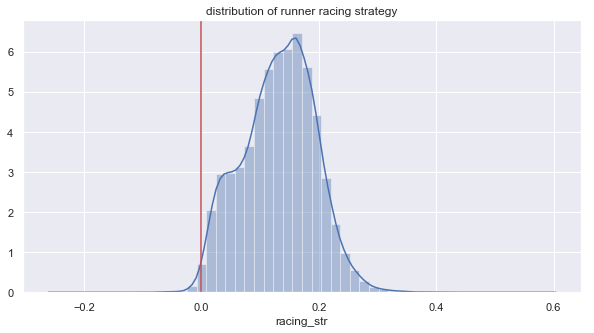

In [147]:
#as a graph
plt.title('distribution of runner racing strategy')
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(data['racing_str']);
plt.axvline(0, color="r", linestyle="-");

### Question 7C: Are there any correlation between any of the variables?

You can use `sns.PairGrid` function or similar. 

Text(0.5,0.98,'correlation between variables')

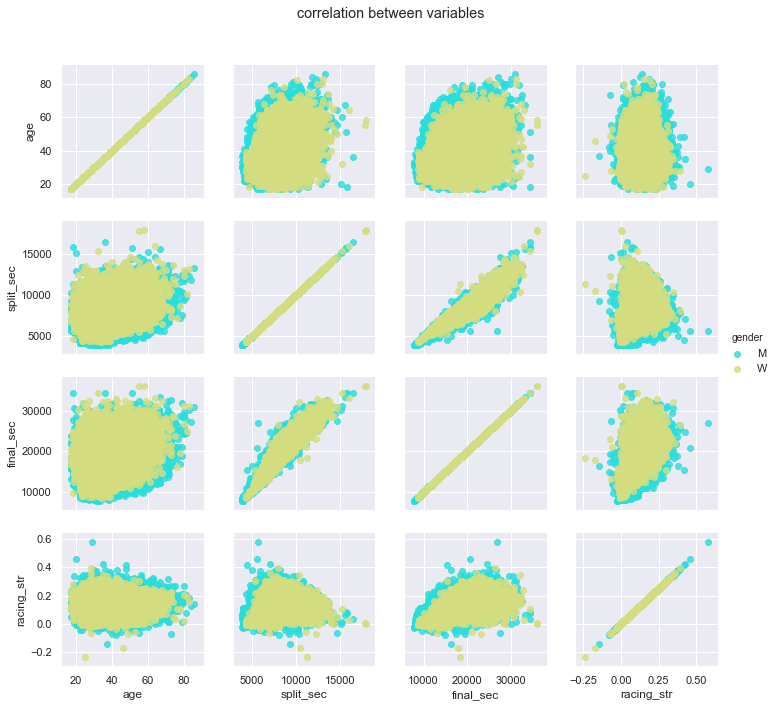

In [170]:
# add your code and explanation here
p = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec','racing_str'],
                 hue='gender', palette='rainbow')
p.map(plt.scatter, alpha=0.8)
p.add_legend()
plt.subplots_adjust(top=0.9)
p.fig.suptitle('correlation between variables')

#racing_str doesn't correlate with age
#racing_str correlates with final time
#faster runners have closer to even splits

### Question 7D: What is the distribution of race strategy by gender? What is your interpretation of the graph?

Text(0.5,0,'racing_str')

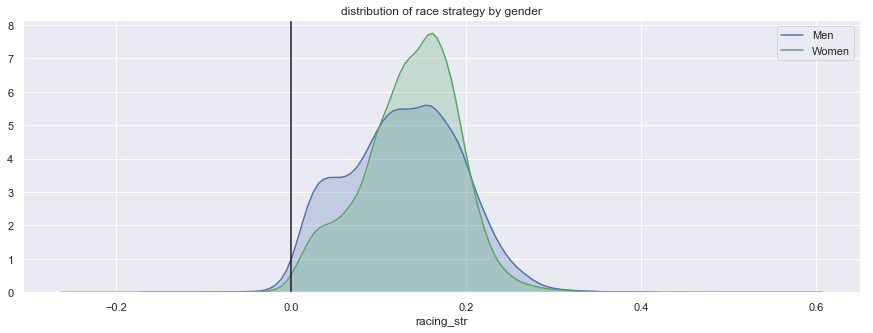

In [193]:
# add your code and explanation here
plt.title('distribution of race strategy by gender')
sns.set(rc={'figure.figsize':(15,5)})
sns.kdeplot(data.racing_str[data.gender=='M'], label='Men', shade=True,color="b")
sns.kdeplot(data.racing_str[data.gender=='W'], label='Women', shade=True, color="g")
plt.axvline(0, color="k", linestyle="-")
plt.xlabel('racing_str')
#more men than women are running an even split
#there is a bimodal distribution
#more women than men women positive split .1-.2

### Question 7E : Compare the race strategy distributions of men and women (7D) as a function of age, use a violin plot.

Create a column named `age_group` to group decade of age, e.g. if a person is 36 years old, `age_group` = 30. Then create a violin plot to show by age group by gender, the distribution of race strategy.Interpret the graph.

In [160]:
# add your code and explanation here
#create age group
data['age_group'] = data.age.map(lambda age: 10 * (age // 10))
data.tail()

,age,gender,split_sec,final_sec,racing_str,age_group
37245,18,M,15864.0,34377.0,0.077057,10
37246,36,M,16543.0,34408.0,0.038421,30
37247,51,M,15755.0,34420.0,0.084544,50
37248,55,W,17886.0,36040.0,0.007436,50
37249,58,W,17989.0,36068.0,0.002495,50


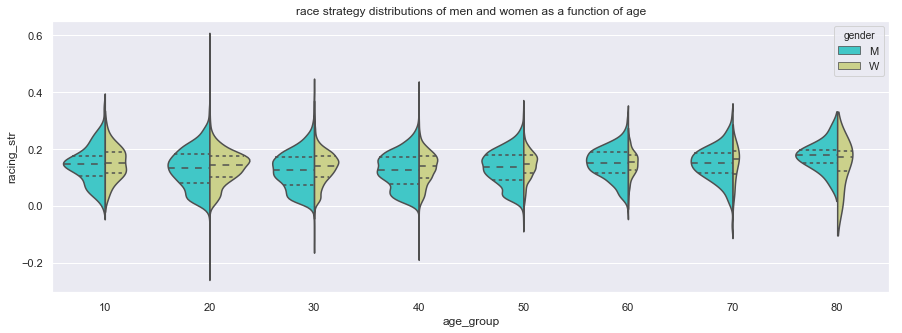

In [168]:
sns.set(rc={'figure.figsize':(15,5)})
sns.violinplot("age_group", "racing_str", hue="gender", data=data, inner="quartile",palette="rainbow",scale="count",split=True)
plt.title('race strategy distributions of men and women as a function of age');

#80 year old women have better splits than ANYONE
#split distributions of men 20-50 have more lower splits than compared to women

In [184]:
data.loc[data.racing_str == 0]
#all the people with perfect splits are men -- I was just curious

,age,gender,split_sec,final_sec,racing_str,age_group
841,42,M,5352.0,10704.0,0.0,40
1096,40,M,5461.0,10922.0,0.0,40
1897,49,M,5789.0,11578.0,0.0,40
2249,45,M,5893.0,11786.0,0.0,40


In [192]:
data.loc[(data.age_group == 80) & (data.gender == 'W')]
#there are only 4 women in age group 80; distribution estimated from a small number
#there isn't enough evidence to assume all 80 year old women have good splits

,age,gender,split_sec,final_sec,racing_str,age_group
35915,82,W,10106.0,24931.0,0.189282,80
36635,80,W,13043.0,26670.0,0.021897,80
37214,83,W,13149.0,31178.0,0.156521,80
37215,80,W,12404.0,31182.0,0.204413,80


**Assignment 3-Part2 complete.**